## Guideline

**Devising a marketing strategy**
-  You are at a marketing team and you want to do a **target marketing**
-  Using raw data given, you are to process data and using analysis that we have done during the class, try to come up with target marketing.
-  For each target group, you can write a short paragraph describing their consuming behavior, and how you would conduct target marketing for each group.
-  Within data, there are a lot of info available so whichever data you choose, it is up to you.

-  Upload the following files:
    - 1) jupyternotebook file 
    - 2) a word file with figures and written descriptions. (up to 4 pages including everything would be fine)

## Assignment

### Data Preprocessing

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_excel('Updated_Marketing_Campaign_Data.xlsx')
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Encoded,Marital_Status_Encoded,Customer_Segment,Churn_Probability,Preferred_Channel,Campaign_Effectiveness,Promotion_Sensitivity,Avg_Spending_per_Purchase,Family_Size,Engagement_Score
0,Bachelor,Single,0.235696,0,0,58,635,88,546,172,...,1,0,High-Value,0.374540,Catalog,Unengaged,Moderately Sensitive,0.076337,Single/No Kids,0.022432
1,Bachelor,Single,-0.235454,1,1,38,11,1,6,2,...,1,0,Low-Value,0.950714,Store,Unengaged,Not Sensitive,-0.240319,Family,0.153968
2,Bachelor,Together,0.773999,0,0,26,426,49,127,111,...,1,1,Moderate-Value,0.731994,Store,Unengaged,Not Sensitive,0.014134,Single/No Kids,-0.087245
3,Bachelor,Together,-1.022355,1,0,26,11,4,20,10,...,1,1,Low-Value,0.598658,Store,Unengaged,Not Sensitive,-0.153016,Couple/No Kids,0.297142
4,PhD,Married,0.241888,1,0,94,173,43,118,46,...,3,2,Moderate-Value,0.156019,Store,Unengaged,Highly Sensitive,-0.021804,Couple/No Kids,-0.037614


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  2240 non-null   object 
 1   Marital_Status             2240 non-null   object 
 2   Income                     2240 non-null   float64
 3   Kidhome                    2240 non-null   int64  
 4   Teenhome                   2240 non-null   int64  
 5   Recency                    2240 non-null   int64  
 6   MntWines                   2240 non-null   int64  
 7   MntFruits                  2240 non-null   int64  
 8   MntMeatProducts            2240 non-null   int64  
 9   MntFishProducts            2240 non-null   int64  
 10  MntSweetProducts           2240 non-null   int64  
 11  MntGoldProds               2240 non-null   int64  
 12  NumDealsPurchases          2240 non-null   int64  
 13  NumWebPurchases            2240 non-null   int64

In [58]:
df.isna().sum()

Education                    0
Marital_Status               0
Income                       0
Kidhome                      0
Teenhome                     0
Recency                      0
MntWines                     0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProds                 0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
Response                     0
Age                          0
Total_Spending               0
Customer_Tenure_Days         0
Social_Media_Engagement      0
Newsletter_Clicks            0
Brand_Loyalty_Score          0
Education_Encoded            0
Marital_Status_Encoded       0
Customer

In [59]:
# Missing Values
weight = df['Total_Spending'].mean()/df['Avg_Spending_per_Purchase'].mean() 

df['Avg_Spending_per_Purchase'] = df.apply(lambda df : weight * df['Total_Spending'] if pd.isna(df['Avg_Spending_per_Purchase']) else df['Avg_Spending_per_Purchase'], axis=1)

In [60]:
# Categorical Values
for col in df.select_dtypes(include='object'):
    print(col, df[col].unique())

Education ['Bachelor' 'PhD' 'Master' 'Basic' 'High school']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Customer_Segment ['High-Value' 'Low-Value' 'Moderate-Value']
Preferred_Channel ['Catalog' 'Store' 'Web']
Campaign_Effectiveness ['Unengaged' 'Engaged']
Promotion_Sensitivity ['Moderately Sensitive' 'Not Sensitive' 'Highly Sensitive']
Family_Size ['Single/No Kids' 'Family' 'Couple/No Kids']


In [61]:
print('Education:\n',df.groupby(by='Education_Encoded')['Education'].value_counts())
print('\nMarital Status:\n',df.groupby(by='Marital_Status_Encoded')['Marital_Status'].value_counts())

Education:
 Education_Encoded  Education  
-1                 High school     203
 0                 Basic            54
 1                 Bachelor       1127
 2                 Master          370
 3                 PhD             486
Name: count, dtype: int64

Marital Status:
 Marital_Status_Encoded  Marital_Status
-1                      Alone               3
                        Absurd              2
                        YOLO                2
 0                      Single            480
 1                      Together          580
 2                      Married           864
 3                      Divorced          232
 4                      Widow              77
Name: count, dtype: int64


In [62]:
# Pre-processing (Categorical Values)
df = df.drop(['Education','Marital_Status'], axis=1)

df['Family_Size'] = df['Family_Size'].apply(lambda x: 1 if x=='Single/No Kids' else(2 if x=='Couple/No Kids' else 3))
df['Customer_Segment'] = df['Customer_Segment'].apply(lambda x: 1 if x=='Low-Value' else(2 if x=='Moderate-Value' else 3))
df['Preferred_Channel'] = df['Preferred_Channel'].apply(lambda x: 1 if x=='Catalog' else(2 if x=='Store' else 3))
df['Campaign_Effectiveness'] = df['Campaign_Effectiveness'].apply(lambda x: 1 if x=='Engaged' else 0)
df['Promotion_Sensitivity'] = df['Promotion_Sensitivity'].apply(lambda x: -1 if x=='Not Sensitive' else(1 if x=='Highly Sensitive' else 0))

# Pre-processing (Drop Unrelated Columns)
df = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Customer_Segment'],axis=1)

### EDA

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Income                     2240 non-null   float64
 1   Kidhome                    2240 non-null   int64  
 2   Teenhome                   2240 non-null   int64  
 3   Recency                    2240 non-null   int64  
 4   MntWines                   2240 non-null   int64  
 5   MntFruits                  2240 non-null   int64  
 6   MntMeatProducts            2240 non-null   int64  
 7   MntFishProducts            2240 non-null   int64  
 8   MntSweetProducts           2240 non-null   int64  
 9   MntGoldProds               2240 non-null   int64  
 10  NumDealsPurchases          2240 non-null   int64  
 11  NumWebPurchases            2240 non-null   int64  
 12  NumCatalogPurchases        2240 non-null   int64  
 13  NumStorePurchases          2240 non-null   int64

In [64]:
# Data Distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,-4.916702e-17,1.000223,-2.017707,-0.667105,-0.034215,0.641241,24.545343
Kidhome,2240.0,4.441964e-01,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.0,5.062500e-01,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.0,4.910938e+01,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2240.0,3.039357e+02,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
MntFruits,2240.0,2.630223e+01,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
MntMeatProducts,2240.0,1.669500e+02,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
MntFishProducts,2240.0,3.752545e+01,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000
MntSweetProducts,2240.0,2.706295e+01,41.280498,0.000000,1.000000,8.000000,33.000000,263.000000
MntGoldProds,2240.0,4.402188e+01,52.167439,0.000000,9.000000,24.000000,56.000000,362.000000


In [65]:
def draw_plot(cols):
    num_cols = 4
    num_rows = (len(cols) + num_cols - 1) // num_cols  
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 2))
    axes = axes.flatten()  
    
    for i, col in enumerate(cols):
        axes[i].hist(df[col], edgecolor='k')
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    
    plt.tight_layout()  
    plt.show()

#### Demography

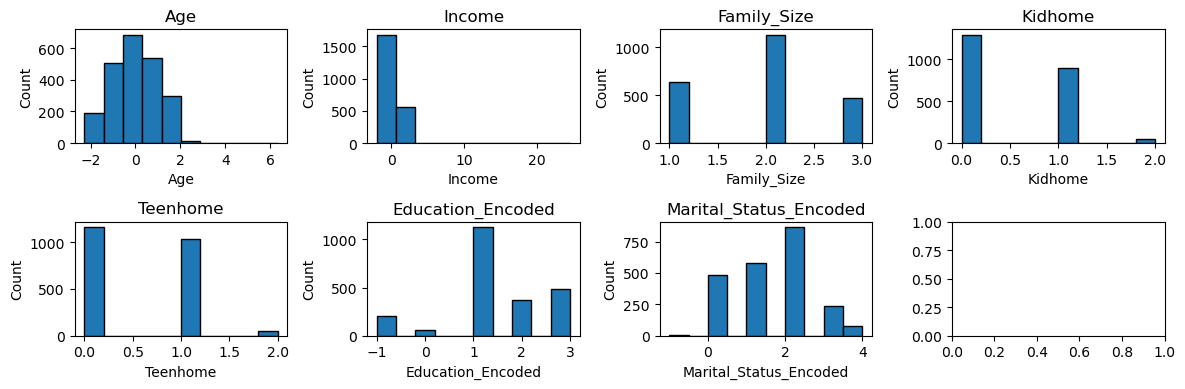

In [66]:
demography = ['Age','Income','Family_Size', 'Kidhome', 'Teenhome', 'Education_Encoded', 'Marital_Status_Encoded']
demography_num = ['Age','Income']
demography_cat = ['Family_Size', 'Kidhome', 'Teenhome', 'Education_Encoded', 'Marital_Status_Encoded']

draw_plot(demography)

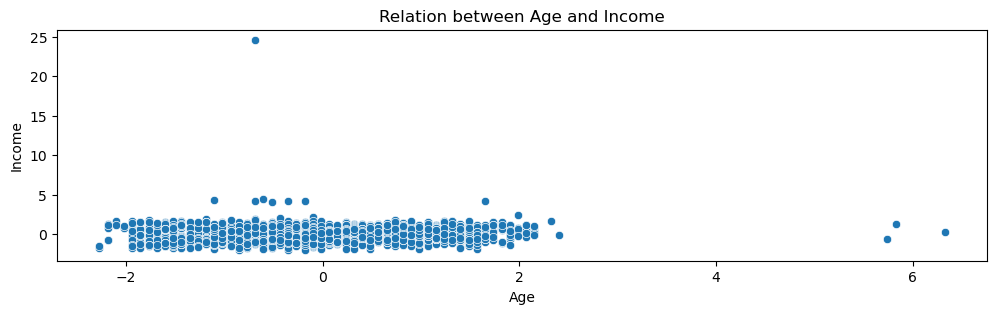

In [67]:
# Age-Income

plt.figure(figsize=(12,3))
sns.scatterplot(data=df, x='Age', y='Income')
plt.title('Relation between Age and Income')

plt.show()

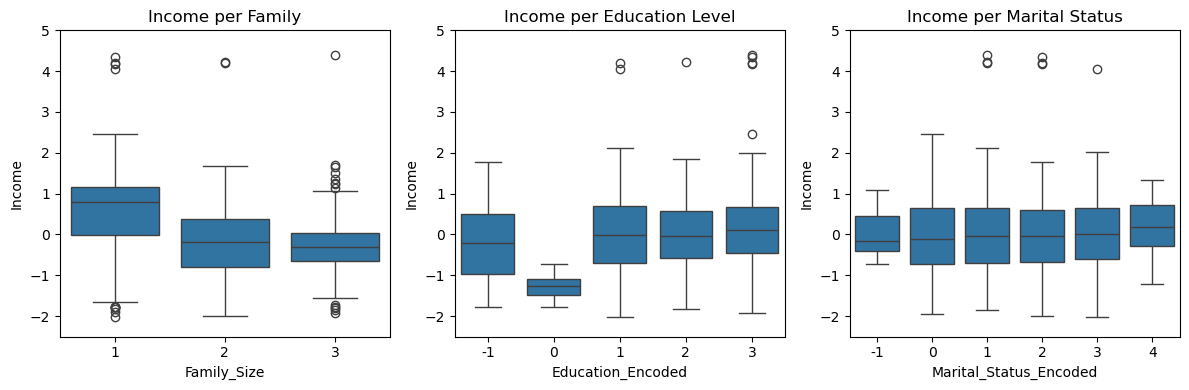

In [68]:
# Income Relation (Family, Education, Marital Status)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.boxplot(data=df, x='Family_Size', y='Income')
plt.ylim(-2.5,5)
plt.title('Income per Family')

plt.subplot(1,3,2)
sns.boxplot(data=df, x='Education_Encoded', y='Income')
plt.ylim(-2.5,5)
plt.title('Income per Education Level')

plt.subplot(1,3,3)
sns.boxplot(data=df, x='Marital_Status_Encoded', y='Income')
plt.ylim(-2.5,5)
plt.title('Income per Marital Status')

plt.tight_layout()
plt.show()

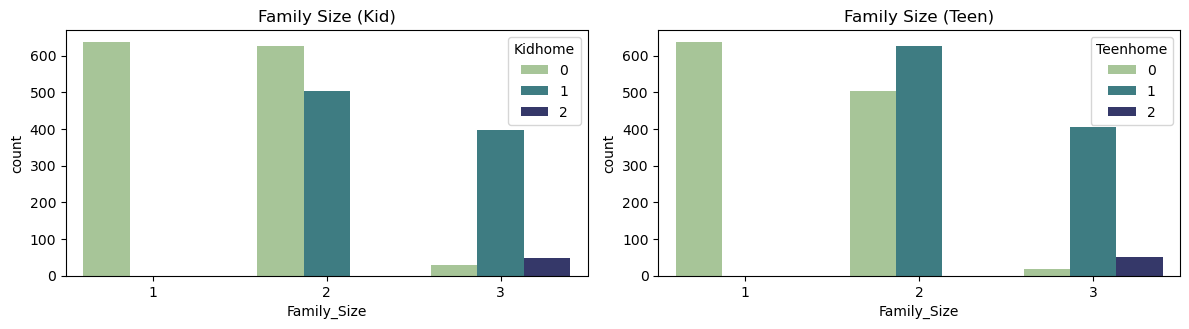

In [69]:
# Family Group

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.countplot(data=df, x='Family_Size', hue='Kidhome', palette='crest')
plt.title('Family Size (Kid)')

plt.subplot(2,2,2)
sns.countplot(data=df, x='Family_Size', hue='Teenhome', palette='crest')
plt.title('Family Size (Teen)')

plt.tight_layout()
plt.show()

## Caution - Family_Size (group 2 - Couple/No Kids)

#### Place

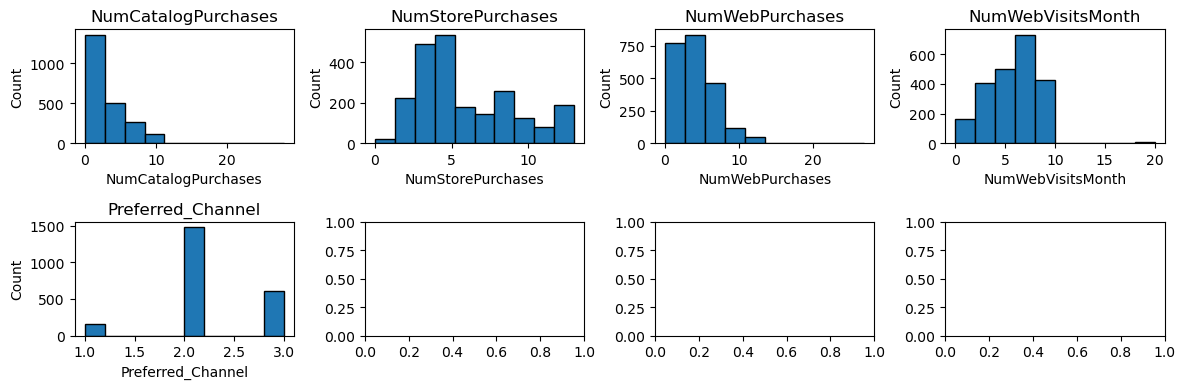

In [70]:
place = ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Preferred_Channel']
place_num = ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
place_cat = ['Preferred_Channel']

draw_plot(place)

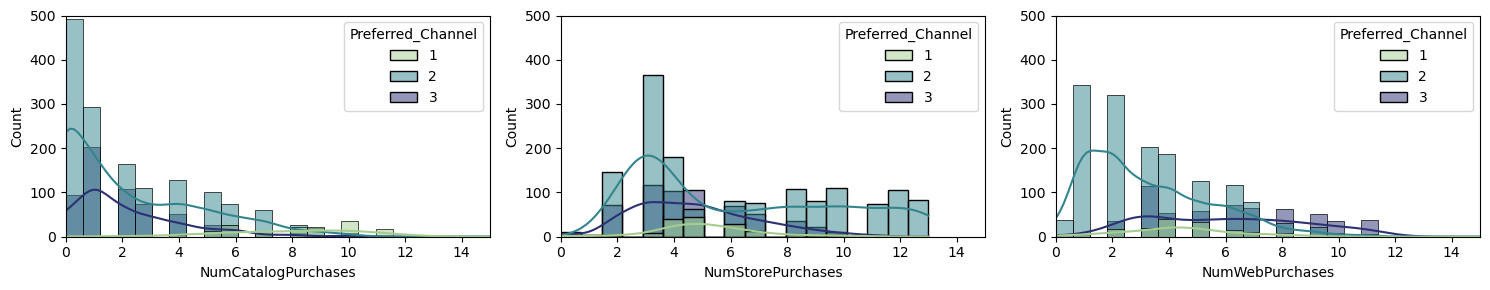

In [71]:
# Purchase per Preferred Channel

plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.histplot(data=df, x='NumCatalogPurchases', hue='Preferred_Channel', kde=True, palette='crest')
plt.xlim(0,15)
plt.ylim(0,500)

plt.subplot(1,3,2)
sns.histplot(data=df, x='NumStorePurchases', hue='Preferred_Channel', kde=True, palette='crest')
plt.xlim(0,15)
plt.ylim(0,500)

plt.subplot(1,3,3)
sns.histplot(data=df, x='NumWebPurchases', hue='Preferred_Channel', kde=True, palette='crest')
plt.xlim(0,15)
plt.ylim(0,500)

plt.tight_layout()
plt.show()

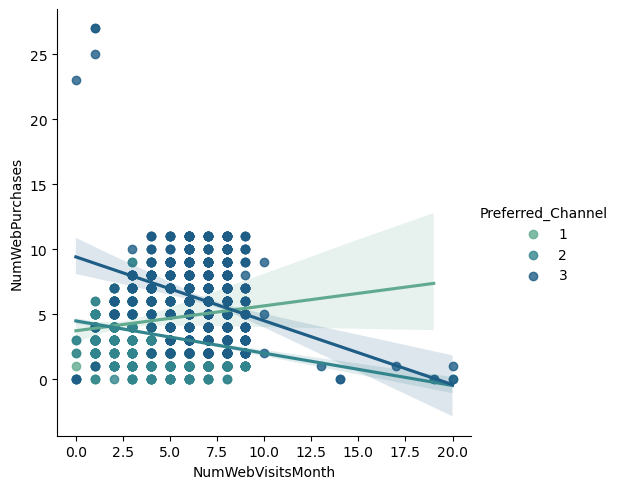

In [72]:
# Web Visit - Web Purchase

sns.lmplot(data=df, x='NumWebVisitsMonth', y='NumWebPurchases', hue='Preferred_Channel', palette='crest')
plt.show()

#### Product

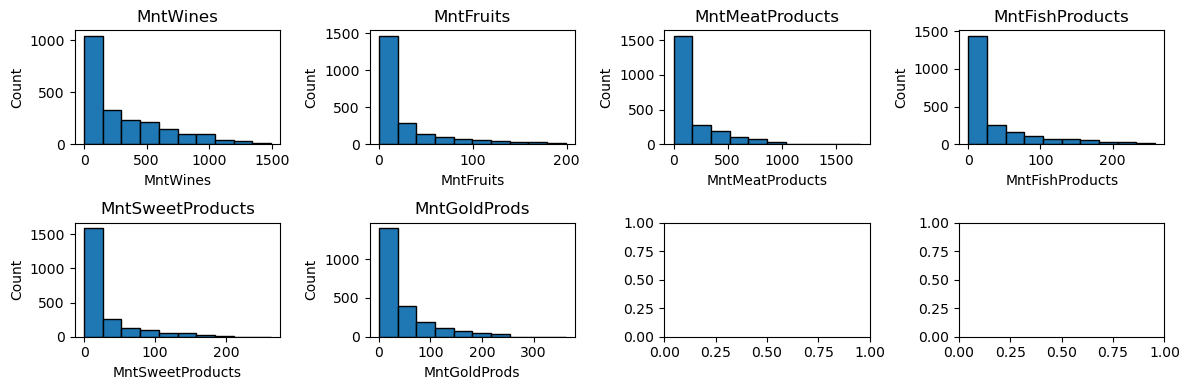

In [73]:
product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

draw_plot(product)

<Axes: >

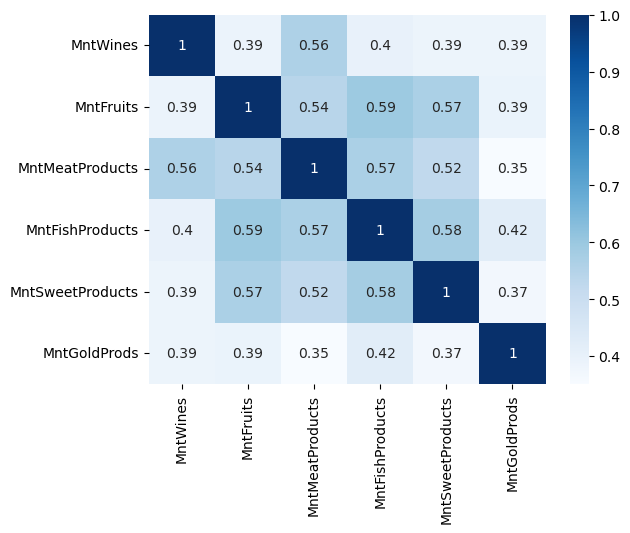

In [74]:
sns.heatmap(df[product].corr(), cmap='Blues', annot=True)

#### Behavior

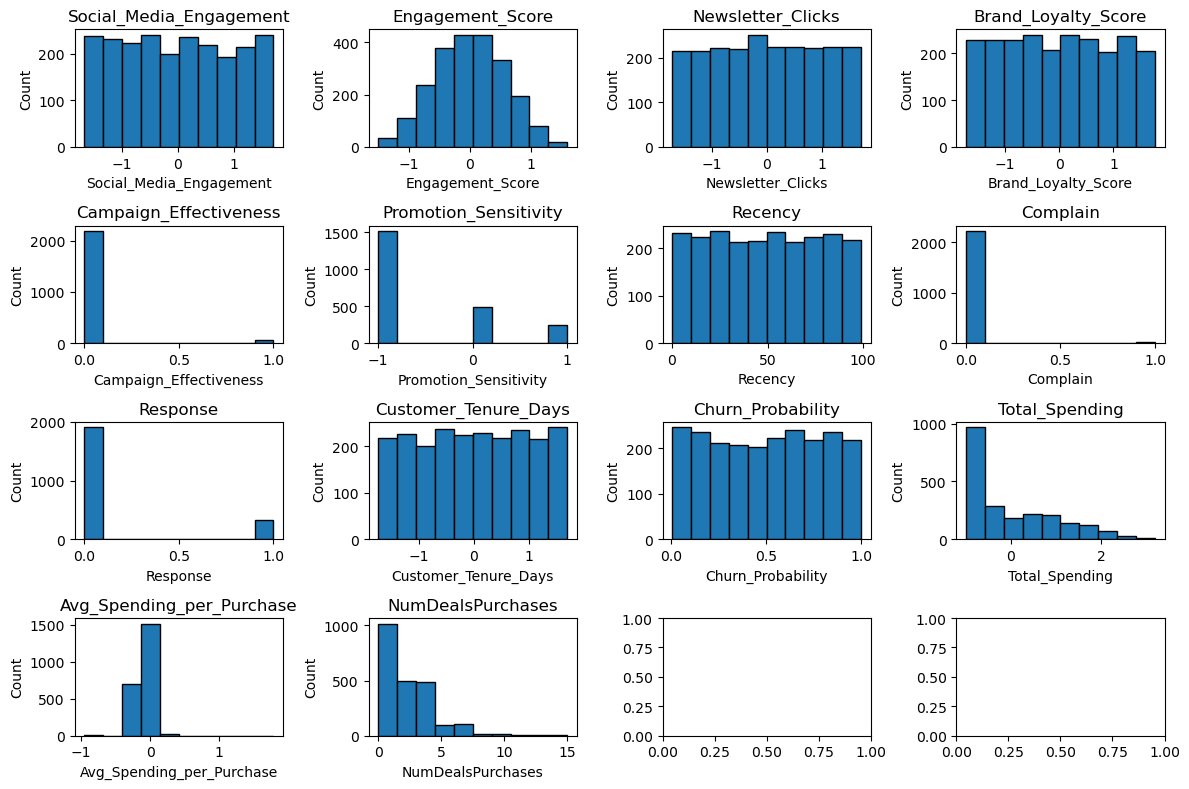

In [75]:
behavior = ['Social_Media_Engagement','Engagement_Score', 'Newsletter_Clicks', 'Brand_Loyalty_Score', 'Campaign_Effectiveness', 
            'Promotion_Sensitivity','Recency', 'Complain', 'Response', 'Customer_Tenure_Days', 'Churn_Probability', 
            'Total_Spending', 'Avg_Spending_per_Purchase','NumDealsPurchases']
behavior_num = ['Social_Media_Engagement','Engagement_Score', 'Newsletter_Clicks', 'Brand_Loyalty_Score',  
                'Recency', 'Customer_Tenure_Days', 'Churn_Probability', 'Total_Spending', 'Avg_Spending_per_Purchase','NumDealsPurchases']
behavior_cat = ['Campaign_Effectiveness','Promotion_Sensitivity','Complain', 'Response']

draw_plot(behavior)

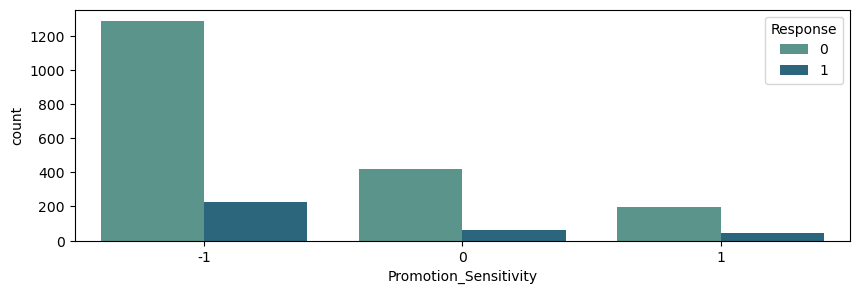

In [76]:
# Promotion Sensitivity per Response

plt.figure(figsize=(10,3))
sns.countplot(data=df, x='Promotion_Sensitivity', hue='Response', palette='crest')
plt.show()


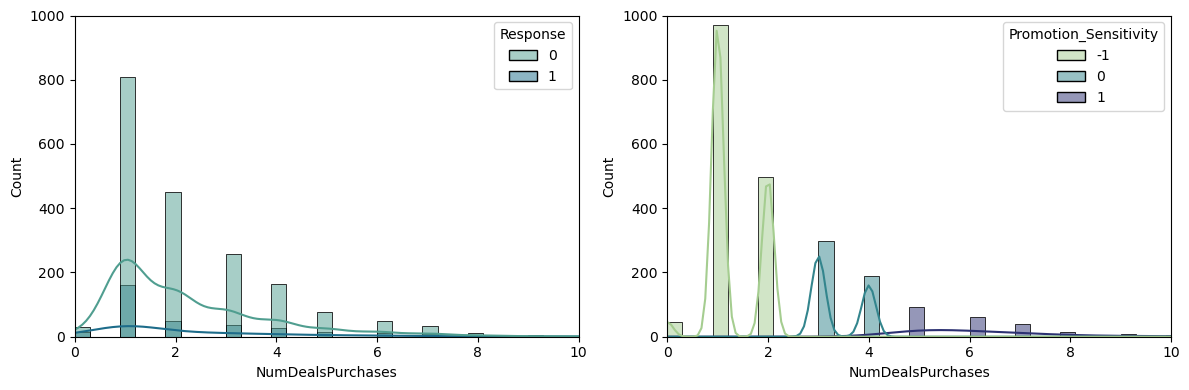

In [77]:
# Discount Reaction (Response/Promotion Sensitivity)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x='NumDealsPurchases', hue='Response', palette='crest',kde=True)
plt.xlim(0,10)
plt.ylim(0,1000)

plt.subplot(1,2,2)
sns.histplot(data=df, x='NumDealsPurchases', hue='Promotion_Sensitivity', palette='crest',kde=True)
plt.xlim(0,10)
plt.ylim(0,1000)

plt.tight_layout()
plt.show()

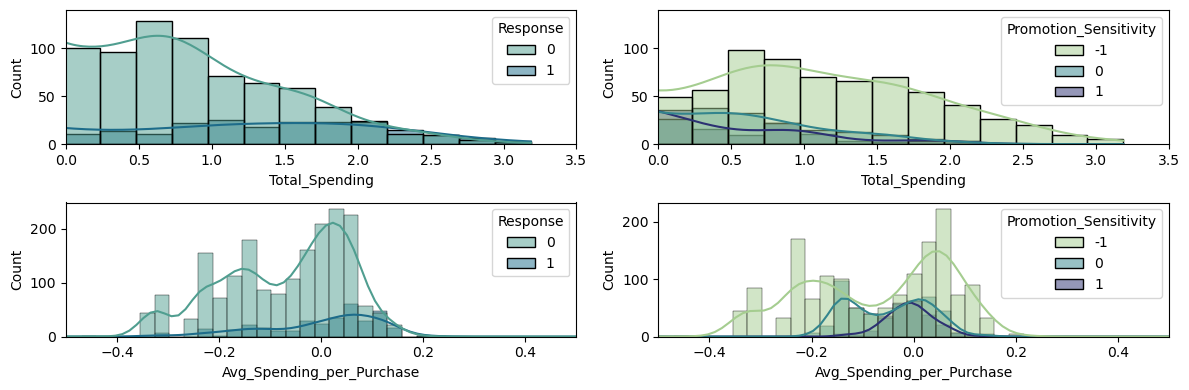

In [78]:
# Total Spending/Avg Spending (Response/Promotion Sensitivity)

plt.figure(figsize=(12,4))

plt.subplot(2,2,1)
sns.histplot(data=df, x='Total_Spending', hue='Response', palette='crest',kde=True)
plt.xlim(0,3.5)
plt.ylim(0,140)

plt.subplot(2,2,2)
sns.histplot(data=df, x='Total_Spending', hue='Promotion_Sensitivity', palette='crest',kde=True)
plt.xlim(0,3.5)
plt.ylim(0,140)

plt.subplot(2,2,3)
sns.histplot(data=df, x='Avg_Spending_per_Purchase', hue='Response', palette='crest',kde=True)
plt.xlim(-0.5,0.5)

plt.subplot(2,2,4)
sns.histplot(data=df, x='Avg_Spending_per_Purchase', hue='Promotion_Sensitivity', palette='crest',kde=True)
plt.xlim(-0.5,0.5)

plt.tight_layout()
plt.show()

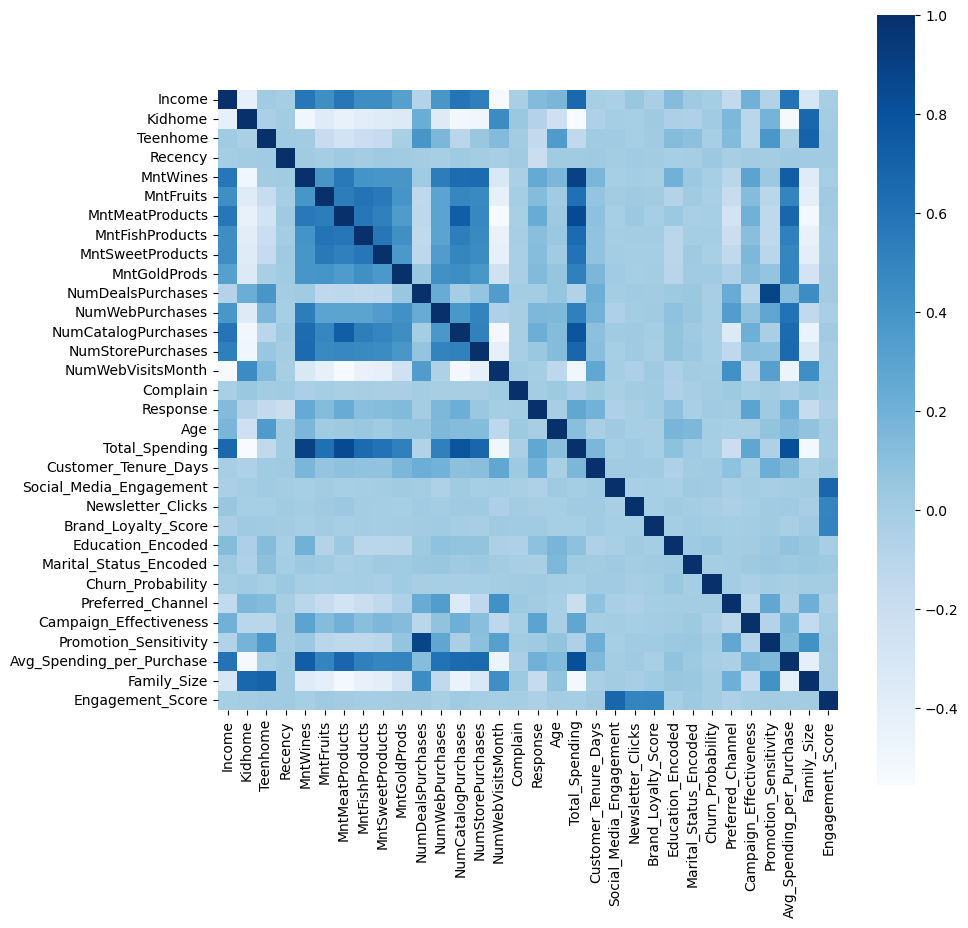

In [79]:
# Correlation between columns
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, cmap='Blues')
plt.show()

In [80]:
# Correlation (Total Spending)

corr['Total_Spending'].sort_values(ascending=False).head(10)

Total_Spending               1.000000
MntWines                     0.891839
MntMeatProducts              0.842965
Avg_Spending_per_Purchase    0.813404
NumCatalogPurchases          0.778577
NumStorePurchases            0.674669
Income                       0.664775
MntFishProducts              0.642818
MntFruits                    0.614229
MntSweetProducts             0.603016
Name: Total_Spending, dtype: float64

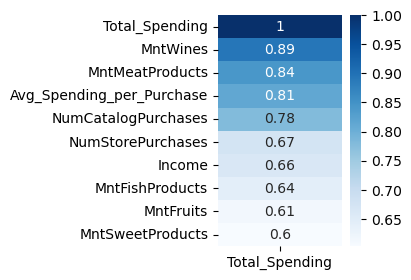

In [81]:
plt.figure(figsize=(2,3))
sns.heatmap(pd.DataFrame(data=corr['Total_Spending'].sort_values(ascending=False).head(10)), cmap='Blues', annot=True)
plt.show()

### Clustering (K-Means)

In [82]:
df_cluster = df[['Total_Spending','MntWines','MntMeatProducts']]

In [83]:
df_cluster.describe()

,Total_Spending,MntWines,MntMeatProducts
count,2.240000e+03,2240.000000,2240.000000
mean,2.696256e-17,303.935714,166.950000
std,1.000223e+00,336.597393,225.715373
min,-9.978133e-01,0.000000,0.000000
25%,-8.919365e-01,23.750000,16.000000
50%,-3.484355e-01,173.500000,67.000000
75%,7.302623e-01,504.250000,232.000000
max,3.187435e+00,1493.000000,1725.000000


In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)
df_cluster_scaled = pd.DataFrame(data=df_cluster_scaled, columns=df_cluster.columns.tolist())

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transormed = pca.fit_transform(df_cluster_scaled)

df['PCA_X'] = transormed[:,0]
df['PCA_Y'] = transormed[:,1]

In [86]:
pca_df = pd.DataFrame(data=pca.components_.T, index=df_cluster_scaled.columns, columns=['PCA_X','PCA_Y'])
pca_df

,PCA_X,PCA_Y
Total_Spending,0.623135,-0.044332
MntWines,0.560233,-0.671365
MntMeatProducts,0.545749,0.739800


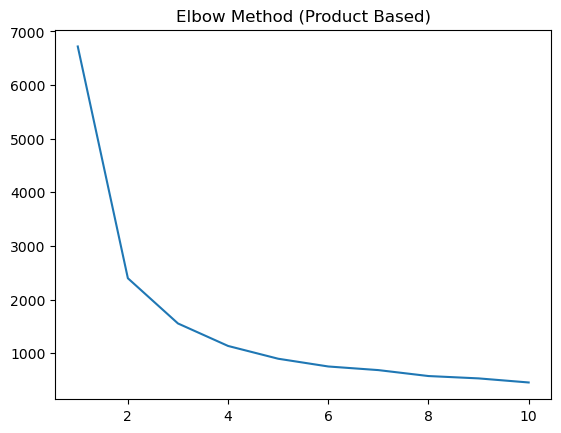

In [87]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=1)
    km.fit(df_cluster_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method (Product Based)')
plt.show()

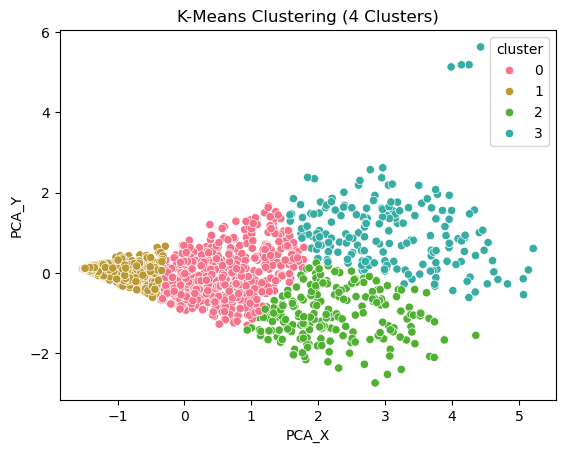

(array([0, 1, 2, 3]), array([ 558, 1240,  239,  203], dtype=int64))

In [88]:
km4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=1)
df['cluster'] = km4.fit_predict(df_cluster_scaled)

sns.scatterplot(x=df['PCA_X'], y=df['PCA_Y'], hue=df['cluster'], palette=sns.color_palette('husl'))
plt.title('K-Means Clustering (4 Clusters)')
plt.show()

np.unique(df['cluster'], return_counts=True)

### Interpretation

In [111]:
df.groupby(by='cluster').mean().T

cluster,0,1,2,3
Income,0.513672,-0.563277,0.781286,1.108902
Kidhome,0.157706,0.708871,0.108787,0.009852
Teenhome,0.652330,0.513710,0.502092,0.064039
Recency,48.501792,48.833871,51.569038,49.566502
MntWines,420.976703,65.907258,953.970711,670.871921
MntFruits,44.137993,7.243548,44.615063,72.133005
MntMeatProducts,217.790323,32.293548,270.665272,727.625616
MntFishProducts,64.224014,10.537097,61.803347,100.408867
MntSweetProducts,45.784946,7.656452,44.619247,73.472906
MntGoldProds,71.550179,21.216935,71.945607,74.778325


In [89]:
# Numerical Feature

def draw_boxplot(cols, hue_col):
    num_cols = 3
    num_rows = (len(cols) + num_cols - 1) // num_cols
    x_col = hue_col

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()  

    for i, col in enumerate(cols):
        sns.boxplot(data=df, x=x_col, y=col, hue=hue_col, palette=sns.color_palette('husl'), ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(col)

    plt.tight_layout()  
    plt.show()

def draw_histplot(cols, hue_col):
    num_cols = 3
    num_rows = (len(cols) + num_cols - 1) // num_cols
    x_col = hue_col

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()  

    for i, col in enumerate(cols):
        sns.histplot(data=df, x=col, hue=hue_col, kde=True, palette=sns.color_palette('husl'), ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(x_col)

    plt.tight_layout()  
    plt.show()

# Categorical Feature

def draw_countplot(cols, hue_col):
    num_cols = 3
    num_rows = (len(cols) + num_cols - 1) // num_cols
    x_col = hue_col

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()  

    for i, col in enumerate(cols):
        sns.countplot(data=df, x=col, hue=hue_col, palette=sns.color_palette('husl'), ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(x_col)

    plt.tight_layout()  
    plt.show()

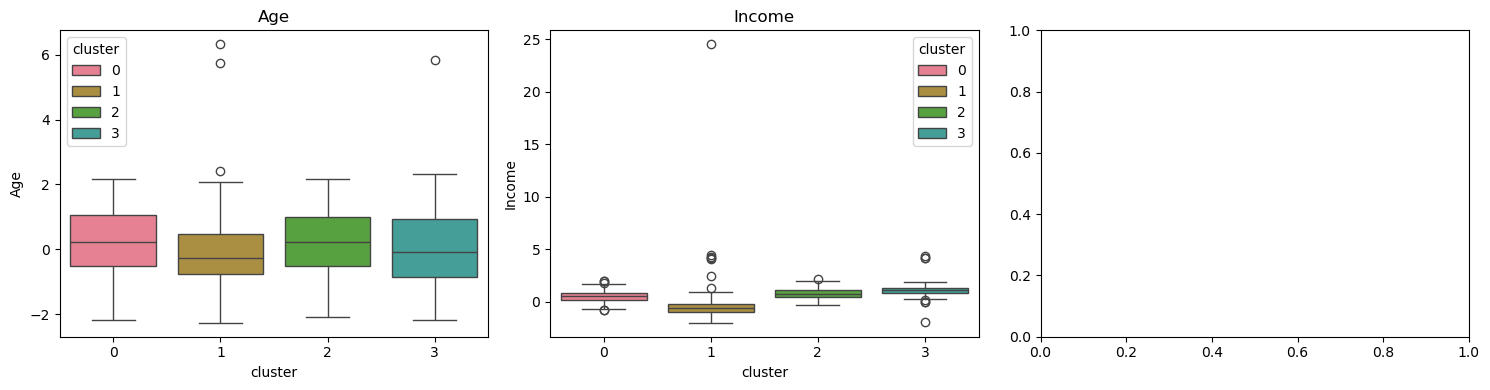

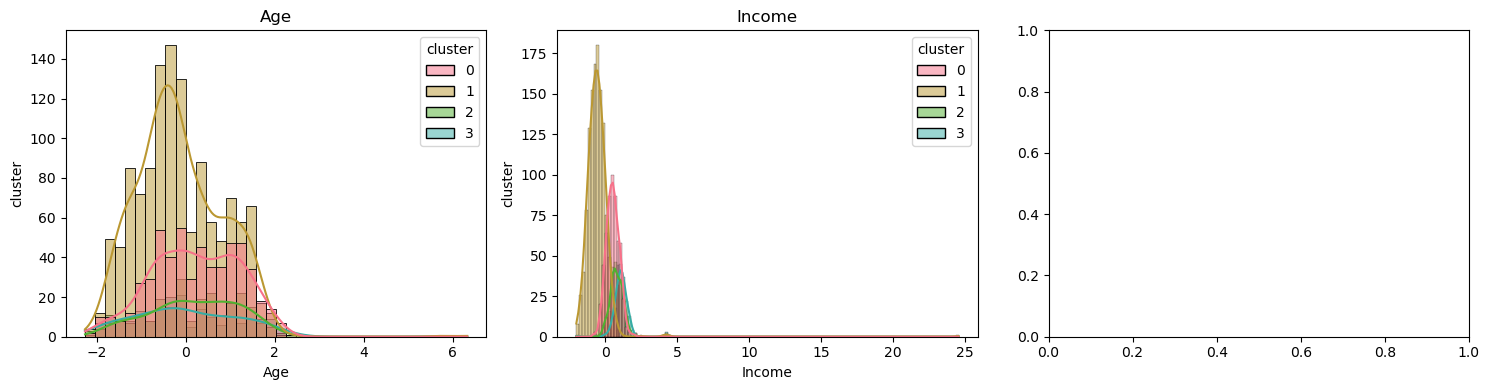

In [90]:
# Demography
draw_boxplot(demography_num,'cluster')
draw_histplot(demography_num,'cluster')

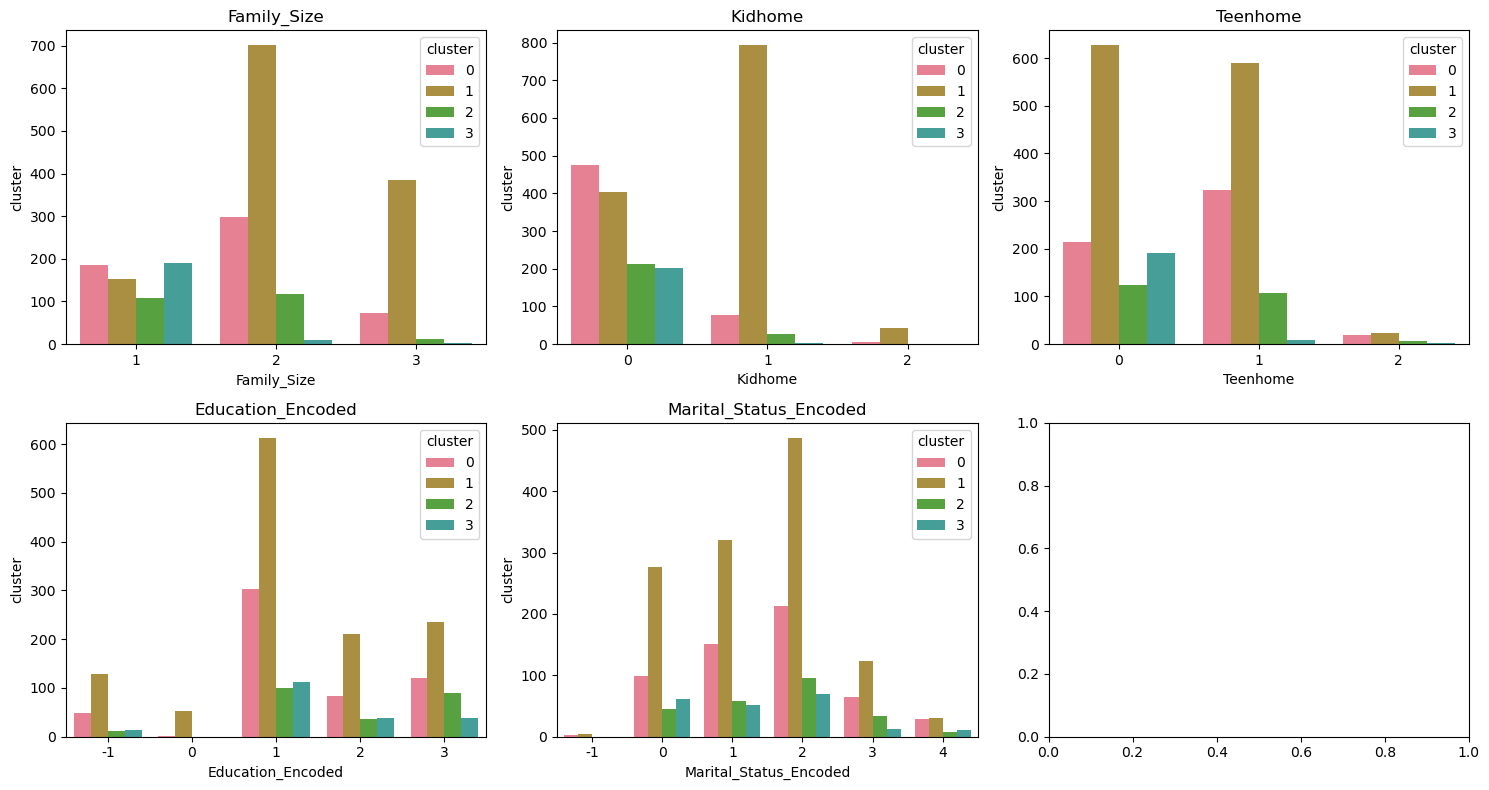

In [91]:
draw_countplot(demography_cat, 'cluster')

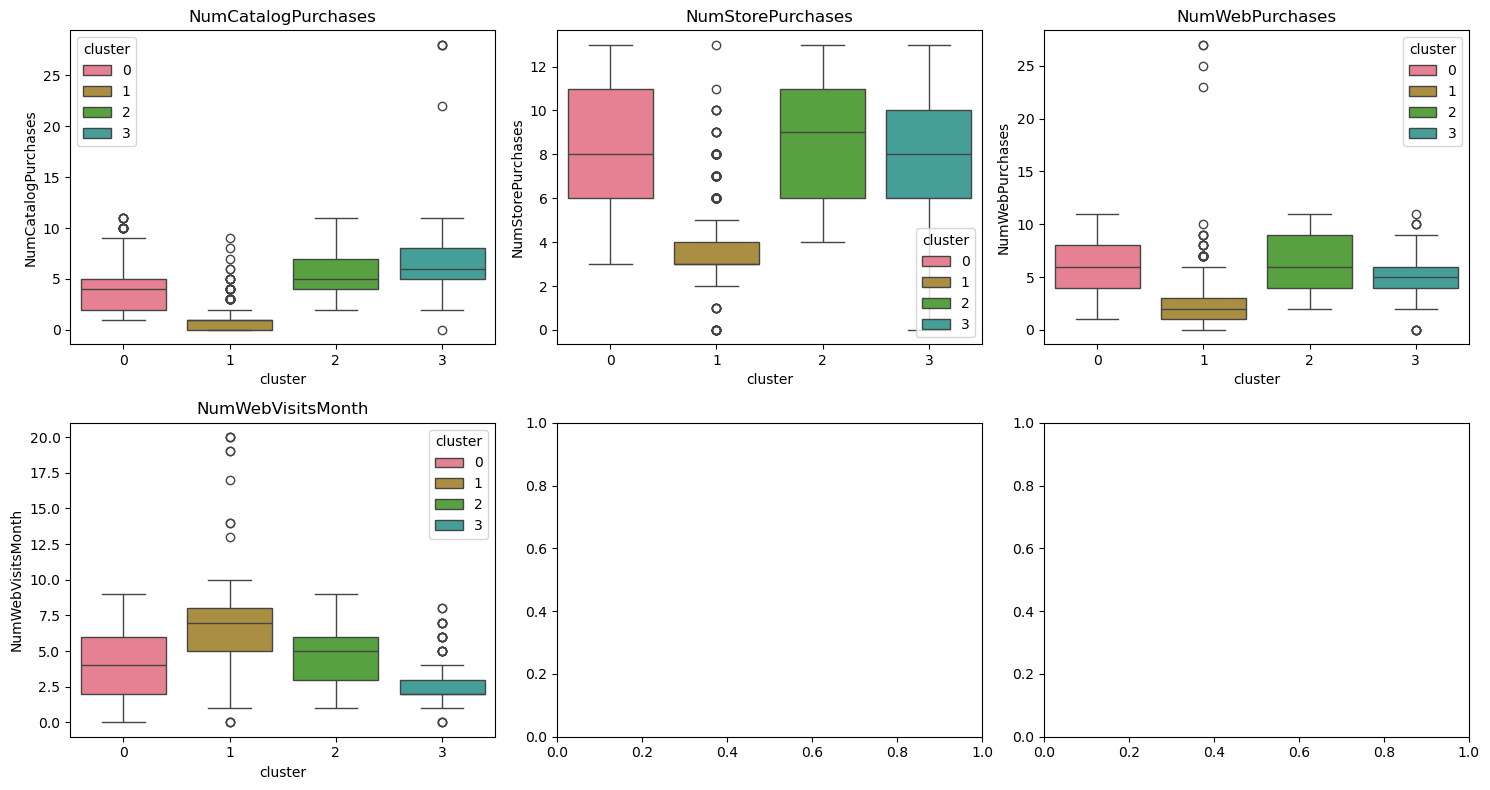

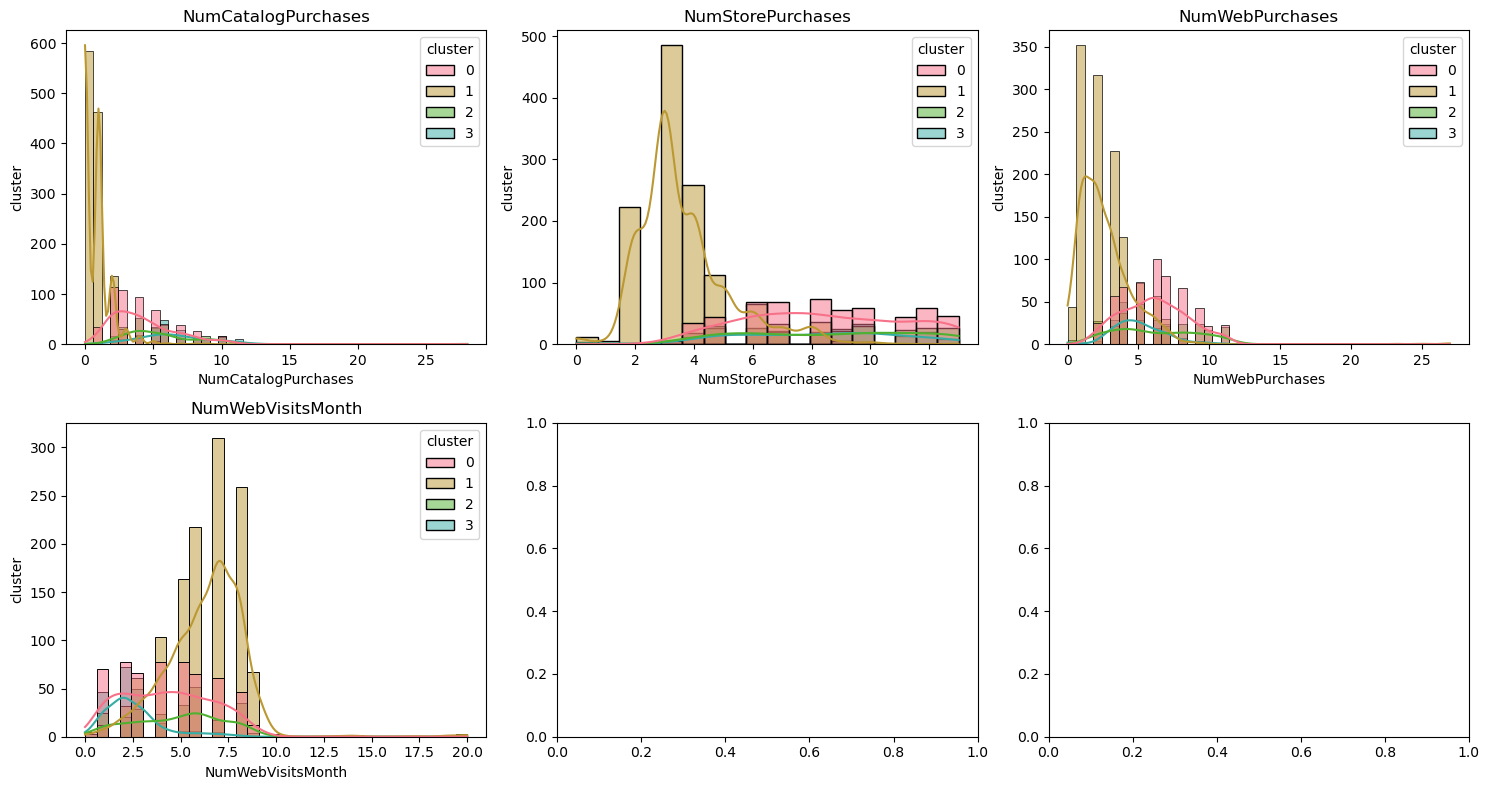

In [92]:
# Place
draw_boxplot(place_num,'cluster')
draw_histplot(place_num,'cluster')

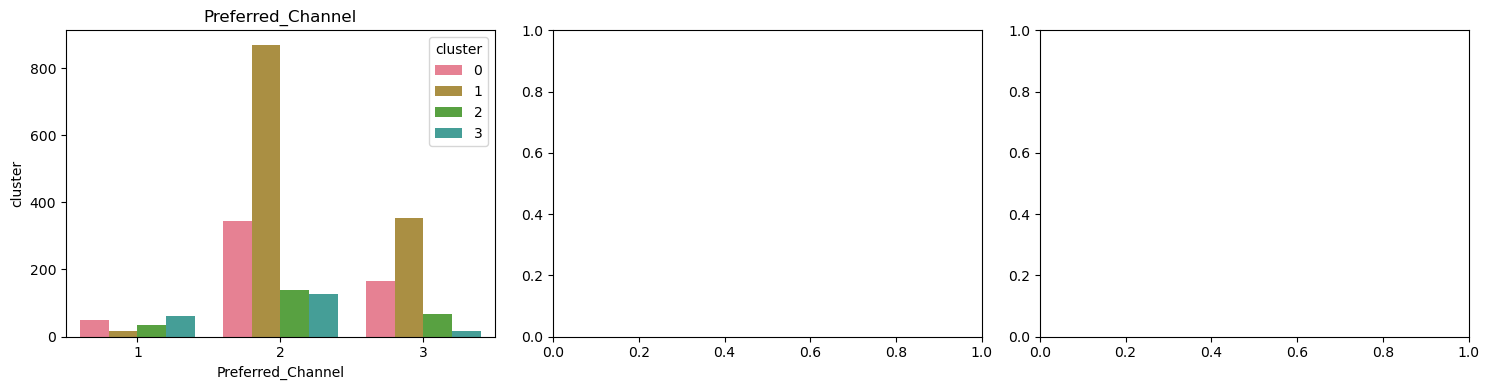

In [93]:
draw_countplot(place_cat,'cluster')

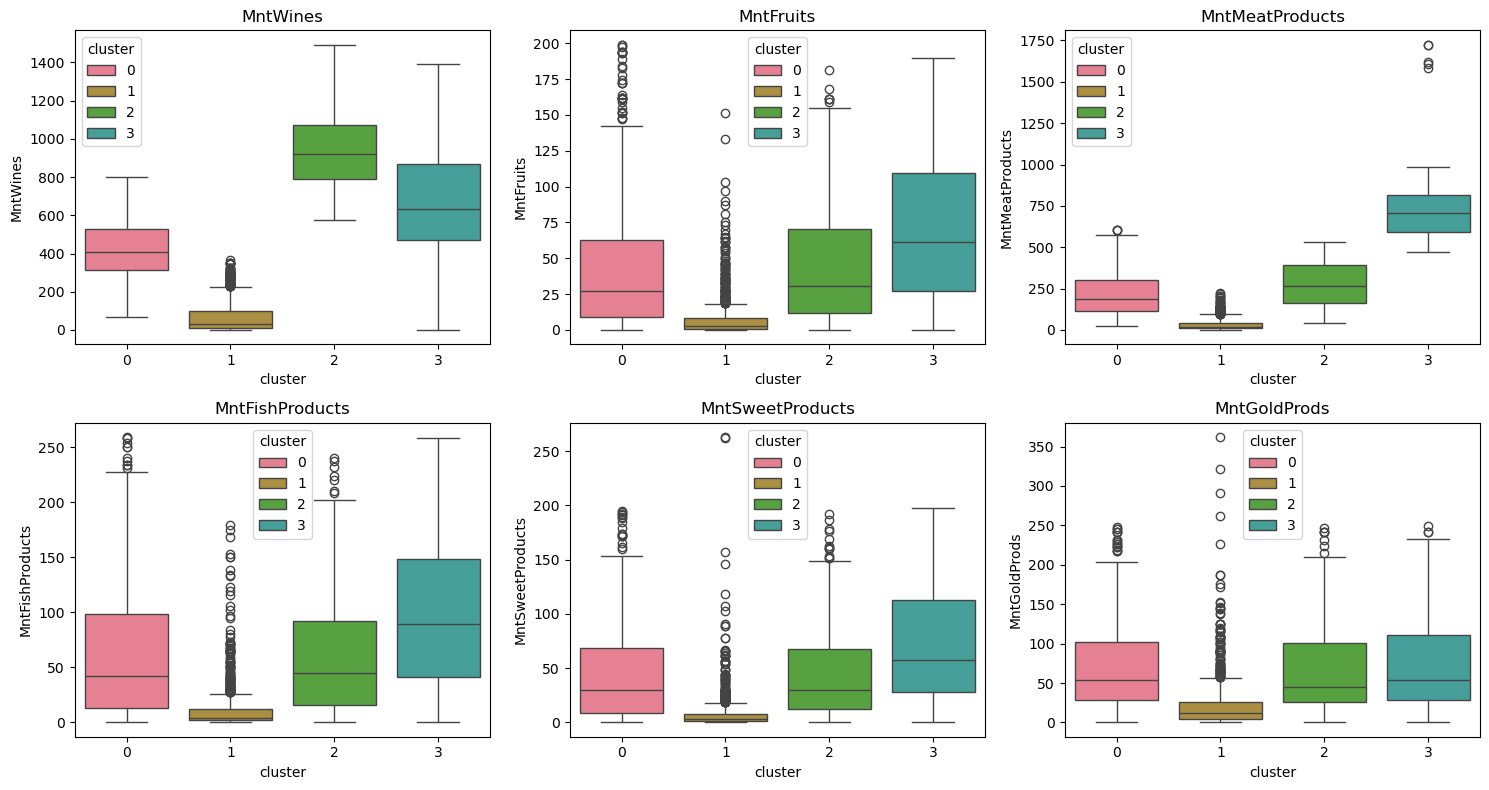

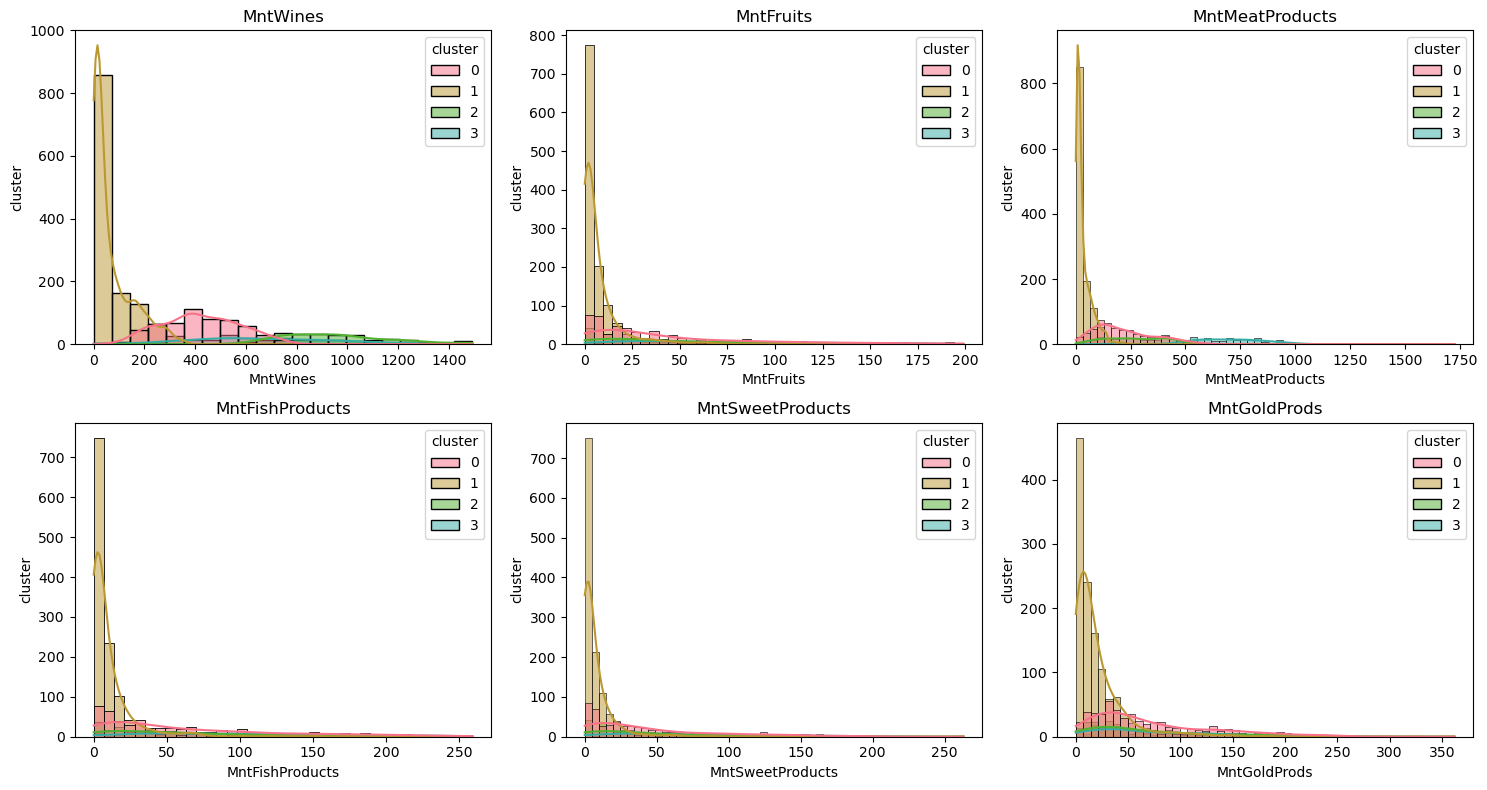

In [94]:
# Product
draw_boxplot(product,'cluster')
draw_histplot(product,'cluster')

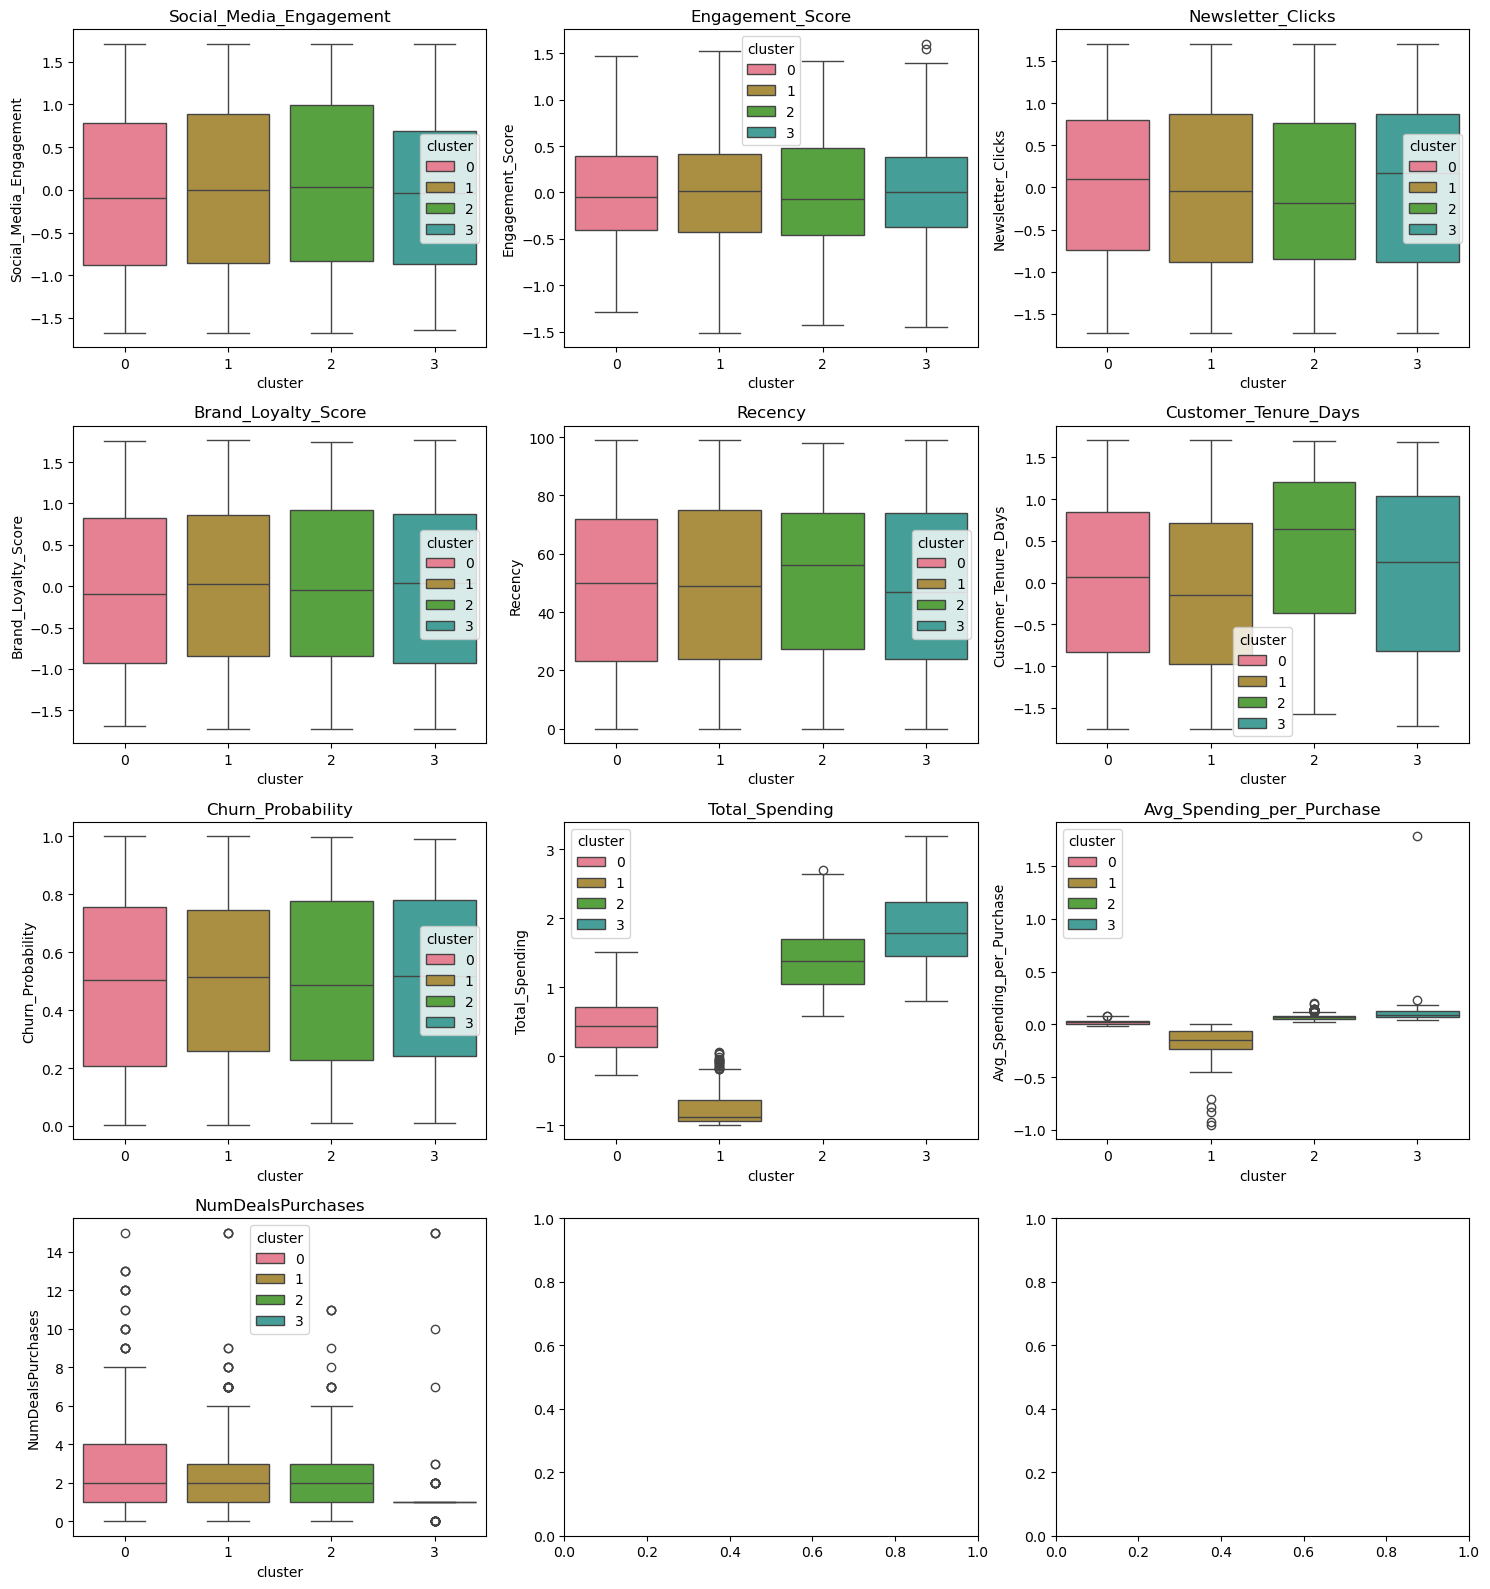

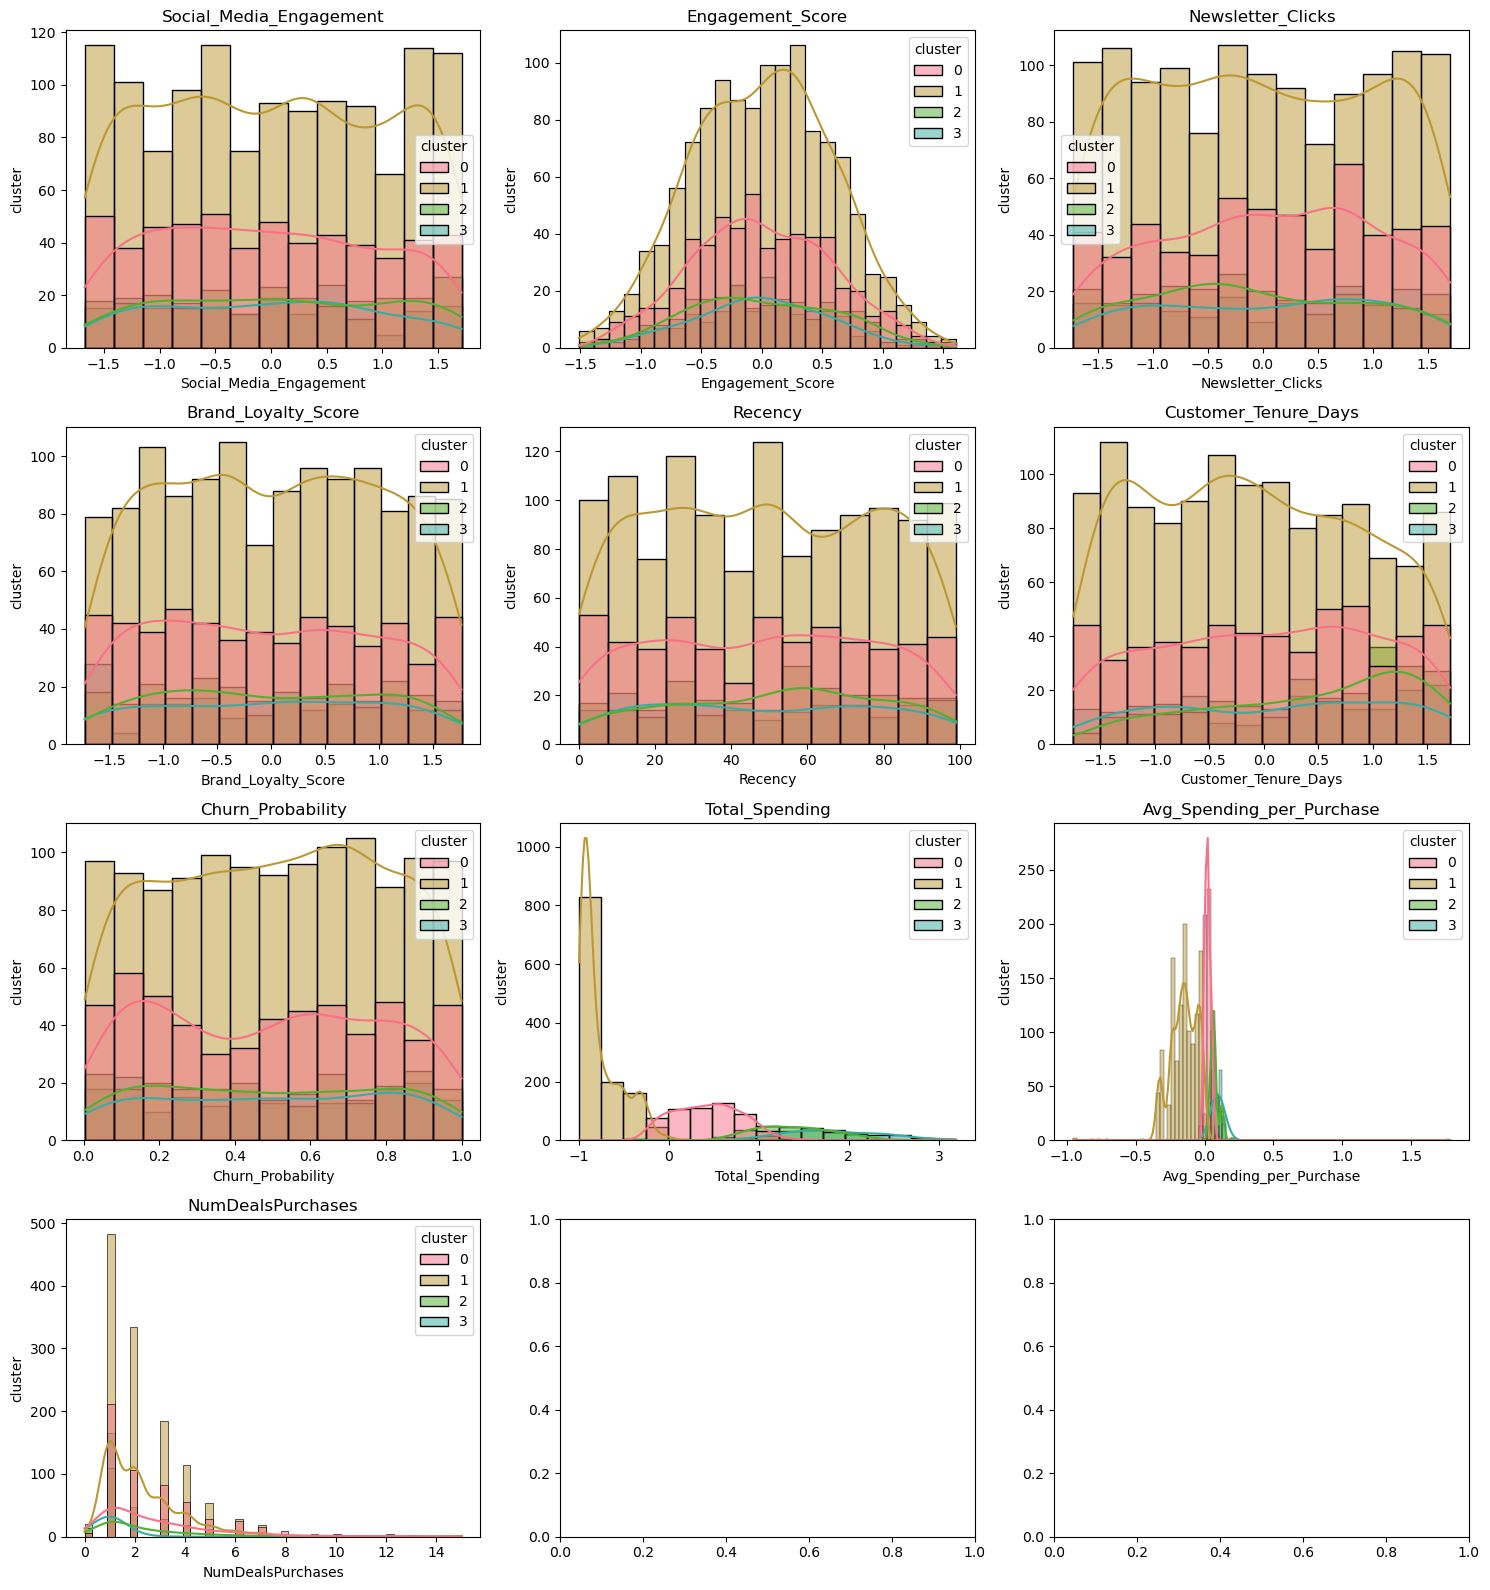

In [95]:
# Behavior
draw_boxplot(behavior_num,'cluster')
draw_histplot(behavior_num,'cluster')


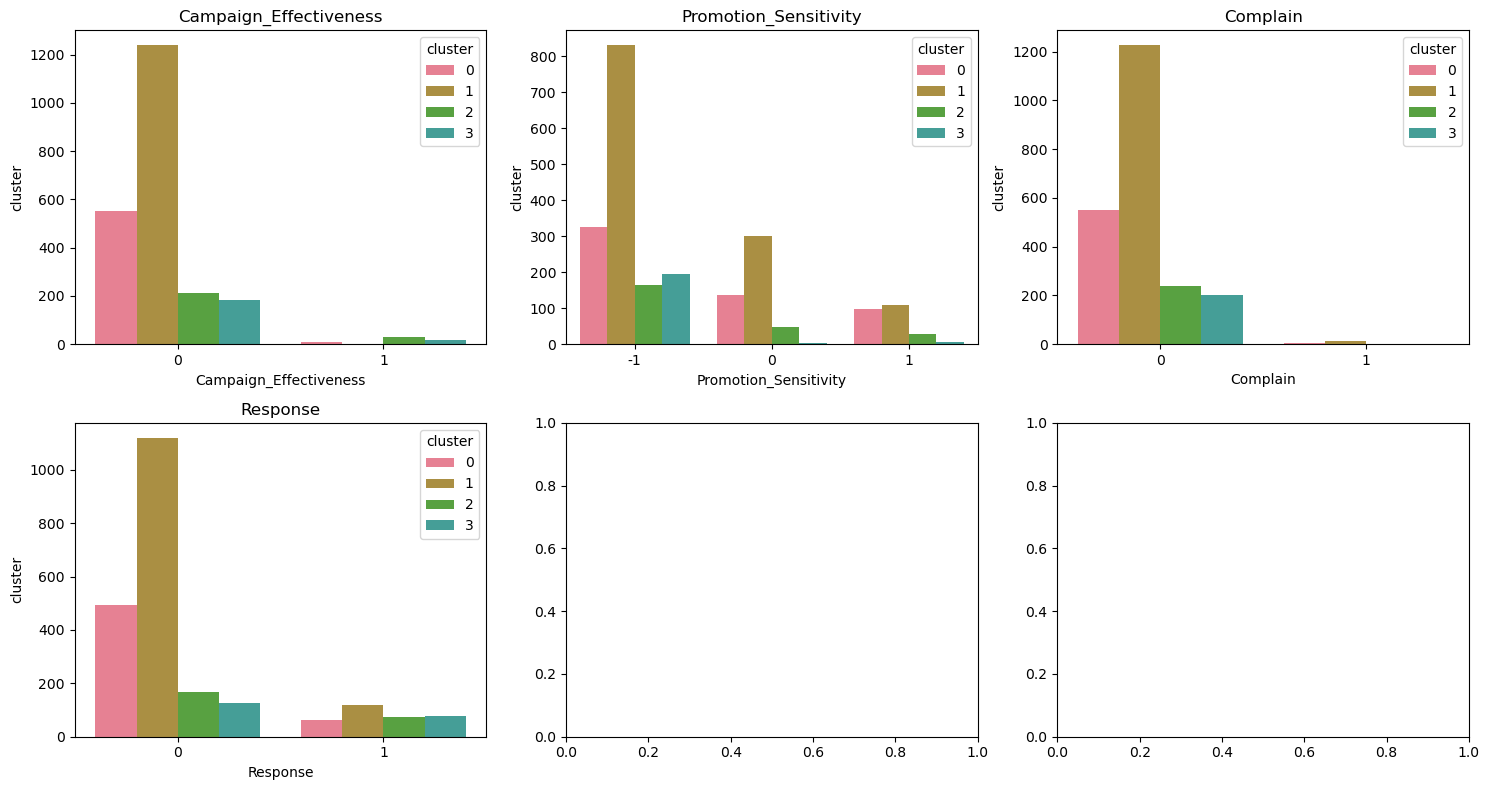

In [96]:
draw_countplot(behavior_cat,'cluster')

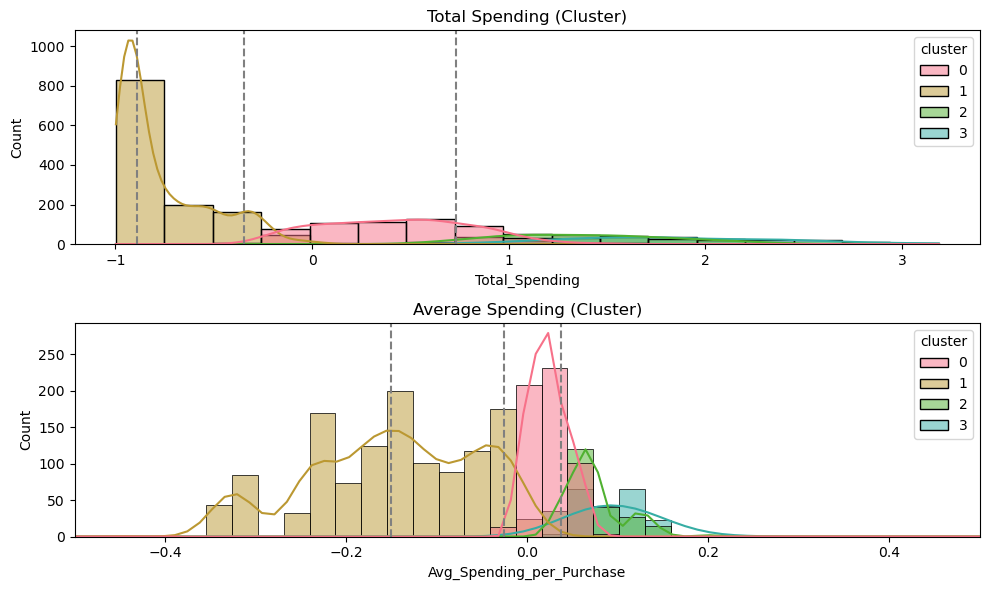

In [97]:
# Total Spending & Average Spending

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
sns.histplot(data=df, x='Total_Spending', hue='cluster', palette=sns.color_palette('husl'), kde=True)
plt.axvline(df['Total_Spending'].quantile(0.25), color='gray', linestyle='--')
plt.axvline(df['Total_Spending'].quantile(0.5), color='gray', linestyle='--')
plt.axvline(df['Total_Spending'].quantile(0.75), color='gray', linestyle='--')
plt.title('Total Spending (Cluster)')

plt.subplot(2,1,2)
sns.histplot(data=df, x='Avg_Spending_per_Purchase', hue='cluster', palette=sns.color_palette('husl'), kde=True)
plt.axvline(df['Avg_Spending_per_Purchase'].quantile(0.25), color='gray', linestyle='--')
plt.axvline(df['Avg_Spending_per_Purchase'].quantile(0.5), color='gray', linestyle='--')
plt.axvline(df['Avg_Spending_per_Purchase'].quantile(0.75), color='gray', linestyle='--')
plt.xlim(-0.5,0.5)
plt.title('Average Spending (Cluster)')

plt.tight_layout()
plt.show()